# かがわAIゼミナール通し課題 KickstarterProjects
クラウドファンディング実施前に成功/失敗を予測するモデルを作成する  

## データにした操作  
(1)不要行の削除  
-欠損を確認したところ name 4 usd pledged 3797の欠損があった。nameを予測で使用したいので、欠損がある4行を削除した。   
-stateがlive(進行中)行を削除した。

(2)不要列の削除  
-説明変数、目的変数に使用しないと判断した列を削除して、データを扱いやすくした。  
&nbsp; 削除した列⇒ID pledged backers usd pledged usd_pledged_real  

(3)特徴列の追加  
既存の列では使える特徴が少ない(pledge～、backersは使えない)ため、クラウドファンディング期間や、成功率の高いカテゴリ、名称の長さ(プロジェクト内容を具体的に説明しているか)、成功率の高い通貨を追加した。  

## 試したことの流れ  
(1)Day1  
ロジスティック回帰での予測。説明変数には列の中で比較的相関度が高かった、currency SuccessHighCategory(成功率が50%以上のmain_category)の2つを使ったが、Accuracyが62.239%と低かった。 

(2)Day2  
ロジスティック回帰での予測。説明変数には列の中で比較的相関度が高かった、nameLength(プロジェクト名称の長さ) SuccessHighCategory(成功率が50%以上のmain_category)の2つを使ったが、Accuracyが62.175%と低かった。

(-)Day1とDay2を振り返って  
標準化/正則化などのデータ整形、モデルはロジスティック回帰のみになっていたのが原因だと思う。また、説明変数の選び方がヒトが判断した相関度が比較的高いかな？と思ったものだったため、数値データをすべて使用して、不要なものを削っていくように変更する。  
Day3ではデータを標準化し、SVM・決定木モデルでの予測を試してみる。

(3)Day3  
ロジスティック回帰(データ標準化)、SVMでの予測。特徴選択、決定木は間に合わず、試せなかった。

## 予測率の推移  
(1)Day1   
　ロジスティック回帰  
　学習用データでの正答率（Accuracy） = 62.080%  
　学習用データでの適合率（Precision） = 63.607%  
　学習用データでの再現率（Recall） = 85.095%  
　<font color="Red">予測用データでの正答率（Accuracy） = 62.239%</font>  
　予測用データでの適合率（Precision） = 63.657%  
　予測用データでの再現率（Recall） = 85.323%  

(2)Day2   
　ロジスティック回帰  
　学習用データでの正答率（Accuracy） = 62.314%  
　学習用データでの適合率（Precision） = 63.576%  
　学習用データでの再現率（Recall） = 86.098%  
　<font color="Red">予測用データでの正答率（Accuracy） = 62.175%</font>  
　予測用データでの適合率（Precision） = 63.501%  
　予測用データでの再現率（Recall） = 86.050%
 
(3)Day3  
　ロジスティック回帰  
　学習用データでの正答率（Accuracy） = 64.447%  
　学習用データでの適合率（Precision） = 64.502%  
　学習用データでの再現率（Recall） = 99.529%  
　<font color="Red">予測用データでの正答率（Accuracy） = 64.399%</font>  
　予測用データでの適合率（Precision） = 64.485%  
　予測用データでの再現率（Recall） = 99.498%  

　ロジスティック回帰(標準化)  
　学習用データでの正答率（Accuracy） = 65.843%  
　学習用データでの適合率（Precision） = 66.217%  
　学習用データでの再現率（Recall） = 95.803%  
　<font color="Red">予測用データでの正答率（Accuracy） = 65.977%</font>  
　予測用データでの適合率（Precision） = 66.294%  
　予測用データでの再現率（Recall） = 95.915%  

　SVM(パラメータ調整なし)  
　学習用データでの正答率（Accuracy） = 65.800%  
　学習用データでの適合率（Precision） = 65.958%  
　学習用データでの再現率（Recall） = 96.837%  
　学習用データでのF1値（F1-score） = 78.469%  
　<font color="Red">予測用データでの正答率（Accuracy） = 65.897%</font>  
　予測用データでの適合率（Precision） = 66.022%  
　予測用データでの再現率（Recall） = 96.890%  
　予測用データでのF1値（F1-score） = 78.531%  

## 0.ライブラリインポート

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import GridSearchCV
import datetime as dt


## 1.CSVデータ読込  

欠損データについて
name 4  
usd pledged 3797  
  
・nameは説明変数として使用予定、usd pledgedはクラウドファンディング終了後でないとわからないため使用しない  
・nameが欠損しているデータは削除する  
・評価基準を合わせるため、state==liveのデータを削除し、stateをTrue、Falseに置換する  

読込直後の件数
378661


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

欠損値削除後の件数
378657
live削除後の件数
375858


,goal,state,usd_goal_real
goal,1.000000,-0.024483,0.941677
state,-0.024483,1.000000,-0.023245
usd_goal_real,0.941677,-0.023245,1.000000


,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real
count,375858,375858,375858,375858,375858,375858.000,375858,375858,375858,375858.000
unique,372996,159,15,14,3149,nan,375289,2,23,nan
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,nan,1970-01-01 01:00:00,False,US,nan
freq,41,22076,63252,293621,705,nan,7,241902,290884,nan
mean,NaN,NaN,NaN,NaN,NaN,48874.533,NaN,NaN,NaN,45327.044
std,NaN,NaN,NaN,NaN,NaN,1176601.141,NaN,NaN,NaN,1145871.039
min,NaN,NaN,NaN,NaN,NaN,0.010,NaN,NaN,NaN,0.010
25%,NaN,NaN,NaN,NaN,NaN,2000.000,NaN,NaN,NaN,2000.000
50%,NaN,NaN,NaN,NaN,NaN,5100.000,NaN,NaN,NaN,5480.000
75%,NaN,NaN,NaN,NaN,NaN,16000.000,NaN,NaN,NaN,15500.000


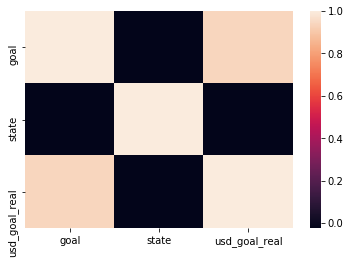

In [2]:
#データ読込
df_ksproj = pd.read_csv("./ks-projects-201801/ks-projects-201801.csv")

print("読込直後の件数")
print(len(df_ksproj))

#不要なデータ/欠損値の確認
display(df_ksproj.isnull().sum())

#nameに欠損があるデータを削除する
df_ksproj = df_ksproj.dropna(subset=['name'])

print("欠損値削除後の件数")
print(len(df_ksproj))

#stateがliveのデータを削除する
df_ksproj = df_ksproj[df_ksproj["state"]!="live"]
print("live削除後の件数")
print(len(df_ksproj))

#stateがsuccessfulのデータの値をTrue、それ以外をFalseに置換する
#相関関係をみるときにTrue=1 False=0と扱われる
df_ksproj["state"] = df_ksproj["state"]=="successful"
#display(df_ksproj)

#不要な列を削除する
#ID
df_ksproj = df_ksproj.drop(['ID'], axis=1)
#pledged～ backers 終了後でないと結果がわからないため
df_ksproj = df_ksproj.drop(['pledged'], axis=1)
df_ksproj = df_ksproj.drop(['backers'], axis=1)
df_ksproj = df_ksproj.drop(['usd pledged'], axis=1)
df_ksproj = df_ksproj.drop(['usd_pledged_real'], axis=1)

#相関関数を表示
display(df_ksproj.corr())

#ヒートマップを表示
sns.heatmap(df_ksproj.corr())

#統計を表示
pd.options.display.precision = 6
pd.options.display.float_format = '{:.3f}'.format
df_ksproj.describe(include='all')


## 2.クラウドファンディング期間(launched～deadline)と成功率の関係を確認  

,goal,state,usd_goal_real,funding_term
goal,1.000,-0.024,0.942,0.004
state,-0.024,1.000,-0.023,-0.026
usd_goal_real,0.942,-0.023,1.000,0.004
funding_term,0.004,-0.026,0.004,1.000


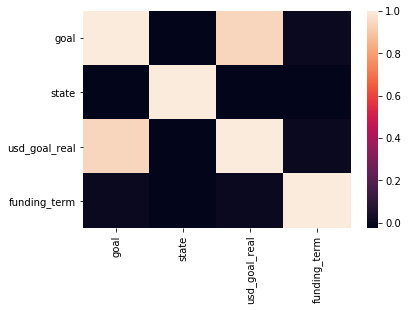

In [3]:
#クラウドファンディング開始～終了までの期間が長ければ成功しやすくなると仮定して、launchedとdeadlineの差を計算する

#日付データをobject型からdatetime型に変換する
df_ksproj['deadline'] = pd.to_datetime(df_ksproj['deadline'])
#launchedから時刻を取り除く
df_ksproj['launched'] = pd.to_datetime(df_ksproj['launched']).dt.date
df_ksproj['launched'] = pd.to_datetime(df_ksproj['launched'])
#クラウドファンディング期間を数値型で用意したfunding_termをデータフレームに追加する
df_ksproj['funding_term'] = df_ksproj['deadline'] - df_ksproj['launched']
df_ksproj['funding_term'] = (df_ksproj['funding_term'] / np.timedelta64(1, 'D')).astype(int)

#相関関数を表示
display(df_ksproj.corr())

#ヒートマップを表示
sns.heatmap(df_ksproj.corr())

## 3.メインカテゴリと成功率の関係を確認  

In [4]:
#メインカテゴリごとに成功率を出してみる
#カテゴリはメインカテゴリと似ているが、細かすぎるので使わない
df_ksproj_groupbycategoryAndstate = df_ksproj.groupby(['main_category', 'state']).size()
print("カテゴリごとのsuccessfulとfailedの件数")
display(df_ksproj_groupbycategoryAndstate)

#機能：メインカテゴリの成功率を表示する
#引数：categoryStr データセット内のメインカテゴリの名称
def checkSuccessRate(categoryStr):
    categorySucRate = df_ksproj_groupbycategoryAndstate[categoryStr, True]/df_ksproj_groupbycategoryAndstate[categoryStr].sum()
    print("{} Success Rate:{}%".format(categoryStr, math.ceil(categorySucRate*100)))
    
checkSuccessRate('Art')
checkSuccessRate('Comics')
checkSuccessRate('Crafts')
checkSuccessRate('Dance')
checkSuccessRate('Design')
checkSuccessRate('Fashion')
checkSuccessRate('Film & Video')
checkSuccessRate('Food')
checkSuccessRate('Games')
checkSuccessRate('Journalism')
checkSuccessRate('Music')
checkSuccessRate('Photography')
checkSuccessRate('Publishing')
checkSuccessRate('Technology')
checkSuccessRate('Theater')

#成功しやすいメインカテゴリの区分をデータフレームに追加する(Success > 50%のメインカテゴリ)
#対象のメインカテゴリ Comics 55% Dance 63% Theater 61%
df_ksproj = df_ksproj.assign(suc_highrate_category = 0)
df_ksproj.loc[df_ksproj['main_category'].isin(['Comics', 'Dance', 'Theater']),'suc_highrate_category'] = 1

display(df_ksproj.head(5))


カテゴリごとのsuccessfulとfailedの件数


main_category  state
Art            False    16448
               True     11510
Comics         False     4901
               True      5842
Crafts         False     6618
               True      2115
Dance          False     1412
               True      2338
Design         False    19214
               True     10550
Fashion        False    16973
               True      5593
Film & Video   False    39629
               True     23623
Food           False    18333
               True      6085
Games          False    22425
               True     12518
Journalism     False     3712
               True      1012
Music          False    27440
               True     24197
Photography    False     7426
               True      3305
Publishing     False    27275
               True     12300
Technology     False    25758
               True      6434
Theater        False     4338
               True      6534
dtype: int64

Art Success Rate:42%
Comics Success Rate:55%
Crafts Success Rate:25%
Dance Success Rate:63%
Design Success Rate:36%
Fashion Success Rate:25%
Film & Video Success Rate:38%
Food Success Rate:25%
Games Success Rate:36%
Journalism Success Rate:22%
Music Success Rate:47%
Photography Success Rate:31%
Publishing Success Rate:32%
Technology Success Rate:20%
Theater Success Rate:61%


,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,funding_term,suc_highrate_category
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11,False,GB,1533.950,59,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02,False,US,30000.000,60,0
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12,False,US,45000.000,45,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17,False,US,5000.000,30,0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04,False,US,19500.000,56,0


## 4.プロジェクト名称と成功率の関係を確認 

,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,funding_term,suc_highrate_category,name_length
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11,False,GB,1533.950,59,0,26
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02,False,US,30000.000,60,0,38
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12,False,US,45000.000,45,0,12
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17,False,US,5000.000,30,0,43
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04,False,US,19500.000,56,0,51


,goal,state,usd_goal_real,funding_term,suc_highrate_category,name_length
goal,1.000,-0.024,0.942,0.004,-0.006,-0.003
state,-0.024,1.000,-0.023,-0.026,0.126,0.059
usd_goal_real,0.942,-0.023,1.000,0.004,-0.006,-0.003
funding_term,0.004,-0.026,0.004,1.000,-0.000,0.009
suc_highrate_category,-0.006,0.126,-0.006,-0.000,1.000,0.003
name_length,-0.003,0.059,-0.003,0.009,0.003,1.000


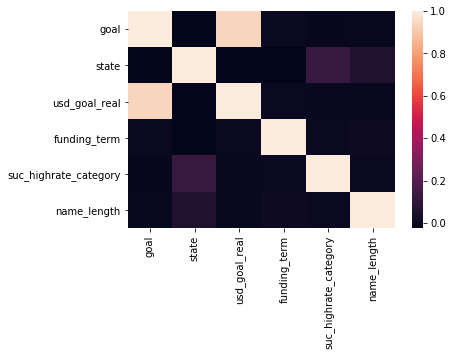

In [5]:
#プロジェクト名称が何をするのか具体的なほうがよいみたい⇒nameの文字数が多いほうがSuccessfulが高いか確認する
#https://entreplanner.jp/crowdfunding/crowdfunding-biz2
#https://agri.mynavi.jp/2018_10_09_42497/

df_ksproj = df_ksproj.assign(name_length = 0)
df_ksproj['name_length'] = df_ksproj['name'].apply(lambda x: len(str(x).replace(' ', '')))

display(df_ksproj.head(5))

#相関関数を表示
display(df_ksproj.corr())

#ヒートマップを表示
sns.heatmap(df_ksproj.corr())

## 5.通貨種類と成功率の関係を確認  

通貨ごとのsuccessfulとfailedの件数


currency  state
AUD       False      5869
          True       2011
CAD       False     10693
          True       4137
CHF       False       567
          True        187
DKK       False       751
          True        362
EUR       False     13194
          True       3882
GBP       False     21771
          True      12081
HKD       False       367
          True        216
JPY       False        24
          True          7
MXN       False      1249
          True        396
NOK       False       551
          True        163
NZD       False      1016
          True        448
SEK       False      1259
          True        509
SGD       False       349
          True        178
USD       False    184242
          True     109379
dtype: int64

AUD Success Rate:26%
CAD Success Rate:28%
CHF Success Rate:25%
DKK Success Rate:33%
EUR Success Rate:23%
GBP Success Rate:36%
HKD Success Rate:38%
JPY Success Rate:23%
MXN Success Rate:25%
NOK Success Rate:23%
NZD Success Rate:31%
SEK Success Rate:29%
SGD Success Rate:34%
USD Success Rate:38%


,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,funding_term,suc_highrate_category,name_length,suc_highrate_currency
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11,False,GB,1533.950,59,0,26,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02,False,US,30000.000,60,0,38,1
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12,False,US,45000.000,45,0,12,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17,False,US,5000.000,30,0,43,1
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04,False,US,19500.000,56,0,51,1


,goal,state,usd_goal_real,funding_term,suc_highrate_category,name_length,suc_highrate_currency
goal,1.000,-0.024,0.942,0.004,-0.006,-0.003,-0.014
state,-0.024,1.000,-0.023,-0.026,0.126,0.059,0.080
usd_goal_real,0.942,-0.023,1.000,0.004,-0.006,-0.003,-0.005
funding_term,0.004,-0.026,0.004,1.000,-0.000,0.009,-0.002
suc_highrate_category,-0.006,0.126,-0.006,-0.000,1.000,0.003,0.042
name_length,-0.003,0.059,-0.003,0.009,0.003,1.000,0.011
suc_highrate_currency,-0.014,0.080,-0.005,-0.002,0.042,0.011,1.000


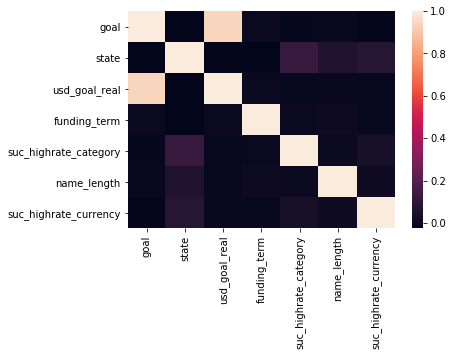

In [6]:
#通貨によって、資金の集まりやすさが違うと想定して、成功率との関係を確認する
df_ksproj_groupbycurrencyAndstate = df_ksproj.groupby(['currency', 'state']).size()
print("通貨ごとのsuccessfulとfailedの件数")
display(df_ksproj_groupbycurrencyAndstate)
#圧倒的にUSDのケース数が多い

#機能：通貨ごとの成功率を表示する
#引数：currencyStr データセット内のメインカテゴリの名称
def checkSuccessRate(currencyStr):
    currencySucRate = df_ksproj_groupbycurrencyAndstate[currencyStr,True]/df_ksproj_groupbycurrencyAndstate[currencyStr].sum()
    print("{} Success Rate:{}%".format(currencyStr, math.ceil(currencySucRate*100)))

#通貨ごとの成功率を確認する
checkSuccessRate('AUD')
checkSuccessRate('CAD')
checkSuccessRate('CHF')
checkSuccessRate('DKK')
checkSuccessRate('EUR')
checkSuccessRate('GBP')
checkSuccessRate('HKD')
checkSuccessRate('JPY')
checkSuccessRate('MXN')
checkSuccessRate('NOK')
checkSuccessRate('NZD')
checkSuccessRate('SEK')
checkSuccessRate('SGD')
checkSuccessRate('USD')

#すべての通貨においてfailedが上回っている
#成功率が30%以上の通貨については、成功しやすい通貨として扱う
#DKK(33%) GBP(36%) HKD(38%) NZD(31%) SGD(34%) USD(38%)

df_ksproj = df_ksproj.assign(suc_highrate_currency = 0)
df_ksproj.loc[df_ksproj['currency'].isin(['DKK', 'GBP', 'HKD', 'NZD', 'SGD', 'USD']),'suc_highrate_currency'] = 1

display(df_ksproj.head(5))

#相関関数を表示
display(df_ksproj.corr())

#ヒートマップを表示
sns.heatmap(df_ksproj.corr())

## 6.ロジスティック回帰での学習/予測

In [7]:
#ロジスティック回帰実装
#y = df_ksproj['state'].values
#X = df_ksproj[['currency','SuccessHighCategory']].values
y = df_ksproj['state'].values
#X = df_ksproj[['funding_term', 'name_length', 'suc_highrate_category', 'suc_highrate_currency']].values
X = df_ksproj[['goal', 'usd_goal_real', 'funding_term', 'suc_highrate_category', 'name_length', 'suc_highrate_currency']].values
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

#loss:使用する損失関数 log⇒ロジスティック回帰、確率的分類子
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
#学習用データを使って学習する
clf.fit(X_train, y_train)

#ラベルを予測
#y_pred = clf.predict(X)
#学習用データでの予測
y_train_pred = clf.predict(X_train)
#予測用データでの予測
y_test_pred = clf.predict(X_test)

#正答率を計算
#accuracy =  accuracy_score(y, y_pred)
#print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

#Precision, Recall, F1-scoreを計算
#precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)
train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred)
test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred)

print('学習用データでの正答率（Accuracy） = {:.3f}%'.format(100 * train_score))
print('学習用データでの適合率（Precision） = {:.3f}%'.format(100 * train_precision[0]))
print('学習用データでの再現率（Recall） = {:.3f}%'.format(100 * train_recall[0]))
print('学習用データでのF1値（F1-score） = {:.3f}%'.format(100 * train_f1_score[0]))

print('予測用データでの正答率（Accuracy） = {:.3f}%'.format(100 * test_score))
print('予測用データでの適合率（Precision） = {:.3f}%'.format(100 * test_precision[0]))
print('予測用データでの再現率（Recall） = {:.3f}%'.format(100 * test_recall[0]))
print('予測用データでのF1値（F1-score） = {:.3f}%'.format(100 * test_f1_score[0]))


学習用データでの正答率（Accuracy） = 56.525%
学習用データでの適合率（Precision） = 76.477%
学習用データでの再現率（Recall） = 46.860%
学習用データでのF1値（F1-score） = 58.112%
予測用データでの正答率（Accuracy） = 56.400%
予測用データでの適合率（Precision） = 76.152%
予測用データでの再現率（Recall） = 46.988%
予測用データでのF1値（F1-score） = 58.117%


## 7.ロジスティック回帰での学習/予測(標準化)

In [11]:
#ロジスティック回帰実装
y = df_ksproj['state'].values
#X = df_ksproj[['funding_term', 'name_length', 'suc_highrate_category', 'suc_highrate_currency']].values
X = df_ksproj[['goal', 'usd_goal_real', 'funding_term', 'suc_highrate_category', 'name_length', 'suc_highrate_currency']].values
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

#標準化
#https://qiita.com/makopo/items/35c103e2df2e282f839a
#8割のデータ量を占めるトレーニングデータを使用してfit(統計情報を学習)する
#そのfitした結果を使って、トレーニングデータとテストデータを標準化する
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train = stdsc.transform(X_train)
X_test = stdsc.transform(X_test)

#loss:使用する損失関数 log⇒ロジスティック回帰、確率的分類子
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
#学習用データを使って学習する
clf.fit(X_train, y_train)

#ラベルを予測
#y_pred = clf.predict(X)
#学習用データでの予測
y_train_pred = clf.predict(X_train)
#予測用データでの予測
y_test_pred = clf.predict(X_test)

#正答率を計算
#accuracy =  accuracy_score(y, y_pred)
#print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

#Precision, Recall, F1-scoreを計算
#precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)
train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred)
test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred)

print('学習用データでの正答率（Accuracy） = {:.3f}%'.format(100 * train_score))
print('学習用データでの適合率（Precision） = {:.3f}%'.format(100 * train_precision[0]))
print('学習用データでの再現率（Recall） = {:.3f}%'.format(100 * train_recall[0]))
print('学習用データでのF1値（F1-score） = {:.3f}%'.format(100 * train_f1_score[0]))

print('予測用データでの正答率（Accuracy） = {:.3f}%'.format(100 * test_score))
print('予測用データでの適合率（Precision） = {:.3f}%'.format(100 * test_precision[0]))
print('予測用データでの再現率（Recall） = {:.3f}%'.format(100 * test_recall[0]))
print('予測用データでのF1値（F1-score） = {:.3f}%'.format(100 * test_f1_score[0]))

学習用データでの正答率（Accuracy） = 65.843%
学習用データでの適合率（Precision） = 66.217%
学習用データでの再現率（Recall） = 95.803%
学習用データでのF1値（F1-score） = 78.309%
予測用データでの正答率（Accuracy） = 65.977%
予測用データでの適合率（Precision） = 66.294%
予測用データでの再現率（Recall） = 95.915%
予測用データでのF1値（F1-score） = 78.400%


## 8.SVMでの学習/予測

In [7]:
#SVM実装
y = df_ksproj['state'].values
X = df_ksproj[['goal', 'usd_goal_real', 'funding_term', 'suc_highrate_category', 'name_length', 'suc_highrate_currency']].values
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

#標準化
#https://qiita.com/makopo/items/35c103e2df2e282f839a
#8割のデータ量を占めるトレーニングデータを使用してfit(統計情報を学習)する
#そのfitした結果を使って、トレーニングデータとテストデータを標準化する
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train = stdsc.transform(X_train)
X_test = stdsc.transform(X_test)

#ハイパーパラメータを探索するGridSearchは実行時間が長く、間に合わないため見送り。単純なSVMで実行する。
#ハイパーパラメータ
#適当に決めてみる
#svc_param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
#}
#svc_grid_search = GridSearchCV(SVC(), svc_param_grid, cv=10)
#svc_grid_search.fit(X_train, y_train)

#SVM
C = 2
kernel = "rbf"
gamma = 1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(X_train, y_train)

# ↓不要なコードが混じった結果のエラーです。
#  SVMの学習に時間がかかる・学習結果に影響がないためこのままコミットします。

NameError: name 'svc' is not defined

In [9]:
#学習用データでの予測
y_train_pred = clf.predict(X_train)
#予測用データでの予測
y_test_pred = clf.predict(X_test)

#正答率を計算
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

#Precision, Recall, F1-scoreを計算
train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred)
test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred)

print('学習用データでの正答率（Accuracy） = {:.3f}%'.format(100 * train_score))
print('学習用データでの適合率（Precision） = {:.3f}%'.format(100 * train_precision[0]))
print('学習用データでの再現率（Recall） = {:.3f}%'.format(100 * train_recall[0]))
print('学習用データでのF1値（F1-score） = {:.3f}%'.format(100 * train_f1_score[0]))

print('予測用データでの正答率（Accuracy） = {:.3f}%'.format(100 * test_score))
print('予測用データでの適合率（Precision） = {:.3f}%'.format(100 * test_precision[0]))
print('予測用データでの再現率（Recall） = {:.3f}%'.format(100 * test_recall[0]))
print('予測用データでのF1値（F1-score） = {:.3f}%'.format(100 * test_f1_score[0]))

学習用データでの正答率（Accuracy） = 65.800%
学習用データでの適合率（Precision） = 65.958%
学習用データでの再現率（Recall） = 96.837%
学習用データでのF1値（F1-score） = 78.469%
予測用データでの正答率（Accuracy） = 65.897%
予測用データでの適合率（Precision） = 66.022%
予測用データでの再現率（Recall） = 96.890%
予測用データでのF1値（F1-score） = 78.531%



◆2019/08/31
  
　モデル：ロジスティック回帰  
　データ：除外⇒NaN有 stateがsuccessful/failed以外  
　目的変数：state  
　説明変数：currency SuccessHighCategory(成功率が50%以上のmain_category)  
　学習用データでの正答率（Accuracy） = 62.080%  
　学習用データでの適合率（Precision） = 63.607%  
　学習用データでの再現率（Recall） = 85.095%  
　学習用データでのF1値（F1-score） = 72.799%  
　予測用データでの正答率（Accuracy） = 62.239%  
　予測用データでの適合率（Precision） = 63.657%  
　予測用データでの再現率（Recall） = 85.323%  
　予測用データでのF1値（F1-score） = 72.915%   
  
　Accuracyが62%と低い。メインカテゴリの成功率の高さを説明変数で使うのはいいと考えるが、  
　通貨種類でクラウドファンディングが成功/失敗に影響は考えずらい。次回は違う項目を説明変数に使ってみる。   
  
◆2019/09/11  
  
　モデル：ロジスティック回帰  
　データ：除外⇒NaN有(name) stateがsuccessful/failed以外  
　目的変数：successful  
　説明変数：nameLength SuccessHighCategory(成功率が50%以上のmain_category)  
　学習用データでの正答率（Accuracy） = 62.314%  
　学習用データでの適合率（Precision） = 63.576%  
　学習用データでの再現率（Recall） = 86.098%  
　学習用データでのF1値（F1-score） = 73.143%  
　予測用データでの正答率（Accuracy） = 62.175%  
　予測用データでの適合率（Precision） = 63.501%  
　予測用データでの再現率（Recall） = 86.050%  
　予測用データでのF1値（F1-score） = 73.075%   
  
　プロジェクト名称がそのプロジェクトを具体的に表しているほうがよいみたいなので、説明変数として使用してみた。  
　Accuracyが微増したが、低い。次回はSVMで実装してみる。Currencyも説明変数として使用したいが、get_dummiesすると項目が増えすぎる。  
　次回は正則化・標準化などDay2の内容を取り入れる。  
   
◆2019/9/26  
  
  ・評価方法を合わせるため、ホールドアウトの学習・テストデータの分割の割合を変更、stateで使用するステータスを変更
  
  ・評価方法を合わせる変更。説明変数を相関度にこだわっていたのを、数値項目すべてに変更してみた   
　モデル：ロジスティック回帰  
　データ：除外⇒NaN有(name) stateがlive
　目的変数：state  
　説明変数：goal usd_goal_real funding_term suc_highrate_category name_length suc_highrate_currency    
　学習用データでの正答率（Accuracy） = 64.447%  
　学習用データでの適合率（Precision） = 64.502%  
　学習用データでの再現率（Recall） = 99.529%  
　学習用データでのF1値（F1-score） = 78.276%  
　予測用データでの正答率（Accuracy） = 64.399%  
　予測用データでの適合率（Precision） = 64.485%  
　予測用データでの再現率（Recall） = 99.498%  
　予測用データでのF1値（F1-score） = 78.253%  
  
　ロジスティック回帰(標準化)  
　学習用データでの正答率（Accuracy） = 65.843%  
　学習用データでの適合率（Precision） = 66.217%  
　学習用データでの再現率（Recall） = 95.803%  
　学習用データでのF1値（F1-score） = 78.309%  
　予測用データでの正答率（Accuracy） = 65.977%  
　予測用データでの適合率（Precision） = 66.294%  
　予測用データでの再現率（Recall） = 95.915%  
　予測用データでのF1値（F1-score） = 78.400%  

　SVM  
　学習用データでの正答率（Accuracy） = 65.800%  
　学習用データでの適合率（Precision） = 65.958%  
　学習用データでの再現率（Recall） = 96.837%  
　学習用データでのF1値（F1-score） = 78.469%  
　予測用データでの正答率（Accuracy） = 65.897%  
　予測用データでの適合率（Precision） = 66.022%  
　予測用データでの再現率（Recall） = 96.890%  
　予測用データでのF1値（F1-score） = 78.531%  